## Lab 3 - Computational Chemistry
#### Cody R. Drisko

In [1]:
## Packages ##
from ase import Atoms, Atom
from ase.io import write
from ase.visualize import view
from vasp import *
from vasp.vasprc import VASPRC

import numpy as np
import matplotlib.pyplot as plt

___
### 3) Simple SCF Calculations

In [2]:
# These lines specify which queue to submit to, how many cores to request, and your parallel environment.
# They are not necessary if you want to use the default values.

VASPRC['queue.q'] = 'long'
VASPRC['queue.nprocs'] = 8
VASPRC['queue.pe'] = 'smp'

co = Atoms( [ Atom('C',[  0, 0, 0]),
              Atom('O',[1.1, 0, 0]) ],
              cell=(10, 10, 10) )

calc = Vasp('molecules/simple-co',
               xc = 'PBE',    # the exchange-correlation functional
           nbands = 8,        # number of bands
            encut = 350,      # planewave cutoff
           ismear = 1,        # methfessel-paxton smearing
            sigma = 0.01,     # very small smearing factor for a molecule
            atoms = co)

energy = calc.get_potential_energy()
forces = calc.get_forces()
           
print('energy = {0} eV'.format(energy))
print('Forces (eV/Ang.):')
print(forces)
print(calc) # Prints a summary of the calculation
            # Note: Some properties are attributes of the atoms object, and some of the calc. 

energy = -14.69232797 eV
Forces (eV/Ang.):
[[-5.77671642 -0.          0.        ]
 [ 5.77671642  0.         -0.        ]]


Vasp calculation directory:
---------------------------
  [[/afs/crc.nd.edu/user/c/cdrisko/ND-Coursework/Comp_Chem/VASP/CO/molecules/simple-co]]

Unit cell:
----------
       x       y       z             |v|
  v0  10.000   0.000   0.000      10.000 Ang
  v1   0.000  10.000   0.000      10.000 Ang
  v2   0.000   0.000  10.000      10.000 Ang
  alpha, beta, gamma (deg):  90.0  90.0  90.0
  Total volume:                 1000.000 Ang^3
  Stress:    xx     yy     zz     yz     xz     xy
         -0.004  0.002  0.002  0.000 -0.000 -0.000 GPa

  ID  tag     sym    x         y         z        rmsF (eV/A)
  0   0       C      0.000     0.000     0.000       5.78
  1   0       O      1.100     0.000     0.000       5.78
  Potential energy: -14.6923 eV

INPUT Parameters:
-----------------
  ismear    : 1
  nbands    : 8
  sigma     : 0.01
  encut     : 350
  lwave     : Fa

___
### 4) Geometry Optimizations

In [3]:
calc = Vasp('molecules/geometry-co',   # output dir relative to current dir
               xc = 'PBE',  # the exchange-correlation functional
           nbands = 8,      # number of bands
            encut = 350,    # planewave cutoff
           ismear = 1,      # Methfessel-Paxton smearing
            sigma = 0.01,   # very small smearing factor for a molecule
              nsw = 20,     # Number of ionic steps
           ibrion = 2,      # Conjugate gradient algorithm
            atoms = co)

energy = calc.get_potential_energy()
nsteps = calc.get_number_of_ionic_steps()
forces = calc.get_forces()

print('energy = {0} eV'.format(energy))
print('number of geometry steps = {0}'.format(nsteps))
print('Forces (eV/Ang.):')
print(forces)
print('Equilibrium Positions (Angs.):')
for atom in co:
    print(atom.symbol, atom.position)

# Save an image. Note that this is done outside the with statement
write('images/CO-relaxed.png', co, show_unit_cell=2, rotation='60x,-30y,90z')

energy = -14.81175954 eV
number of geometry steps = 7
Forces (eV/Ang.):
[[ 0.00345167 -0.          0.        ]
 [-0.00345167  0.         -0.        ]]
Equilibrium Positions (Angs.):
C [-0.0218995  0.         0.       ]
O [1.1218995 0.        0.       ]


___
### 5) Effect of Unit Cell Size

4 0.624 seconds
5 0.79 seconds
6 0.842 seconds
8 1.823 seconds
10 3.063 seconds


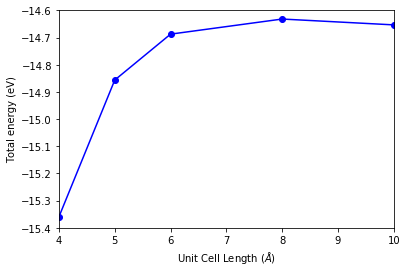

In [4]:
L = [4,5,6,8,10]

energies = []
traj = []

atoms = Atoms( [Atom('C', [  0, 0, 0]),
                Atom('O', [1.2, 0, 0])] )

for a in L:
    atoms.set_cell([a, a, a], scale_atoms=False)
    atoms.center()
    traj += [atoms]
    
    calc = Vasp('molecules/co-L-{0}'.format(a),
               encut = 350,
                  xc = 'PBE',
               atoms = atoms)
    energies.append(calc.get_potential_energy())
    
    print('{0} {1} seconds'.format(a, calc.get_elapsed_time()))
    
plt.plot(L, energies, 'bo-')
plt.xlabel('Unit Cell Length ($\AA$)')
plt.ylabel('Total energy (eV)')
plt.savefig('images/co-e-v.png')
plt.xlim([4, 10])
plt.ylim([-15.4, -14.6])
plt.show()